In [570]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats as stats
import ast



In [571]:
df=pd.read_csv("./movies_metadata.csv")
df.head()

C:\Users\anuso\AppData\Local\Temp\ipykernel_22088\1461538378.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("./movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


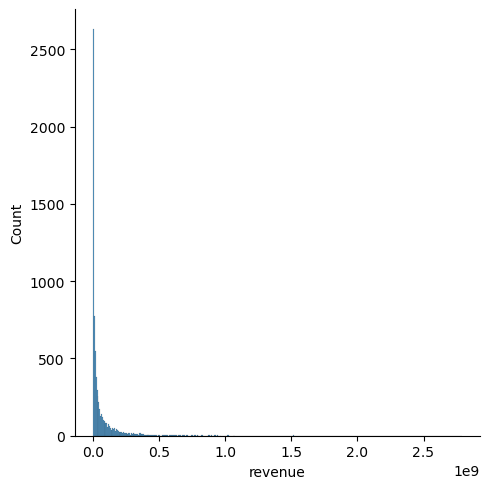

In [ ]:
sns.displot(df.revenue)

หัวข้อ2

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# กรองเฉพาะหนังที่มีข้อมูล release_date และ revenue มากกว่า 0
df = df.dropna(subset=['release_date'])
df = df[df['revenue'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7407 entries, 0 to 45422
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  7407 non-null   object        
 1   belongs_to_collection  1483 non-null   object        
 2   budget                 7407 non-null   object        
 3   genres                 7407 non-null   object        
 4   homepage               2368 non-null   object        
 5   id                     7407 non-null   object        
 6   imdb_id                7407 non-null   object        
 7   original_language      7407 non-null   object        
 8   original_title         7407 non-null   object        
 9   overview               7385 non-null   object        
 10  popularity             7407 non-null   object        
 11  poster_path            7406 non-null   object        
 12  production_companies   7407 non-null   object        
 13  pr

In [578]:
df['release_month'] = df['release_date'].dt.month
df['release_year'] = df['release_date'].dt.year

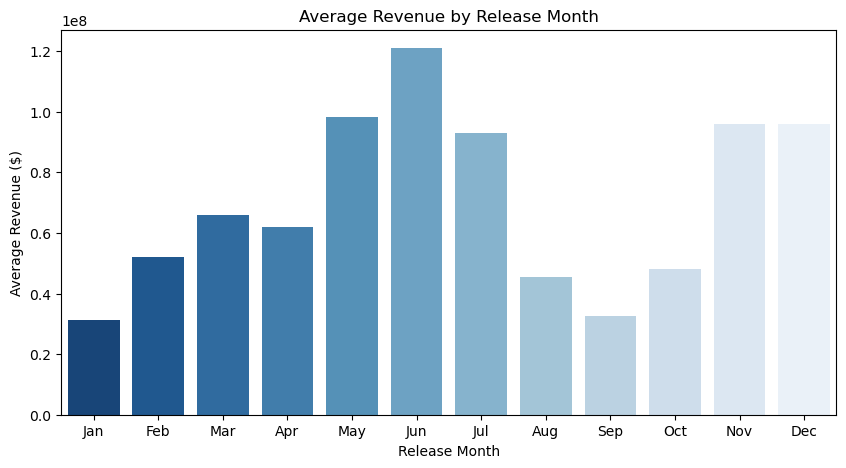

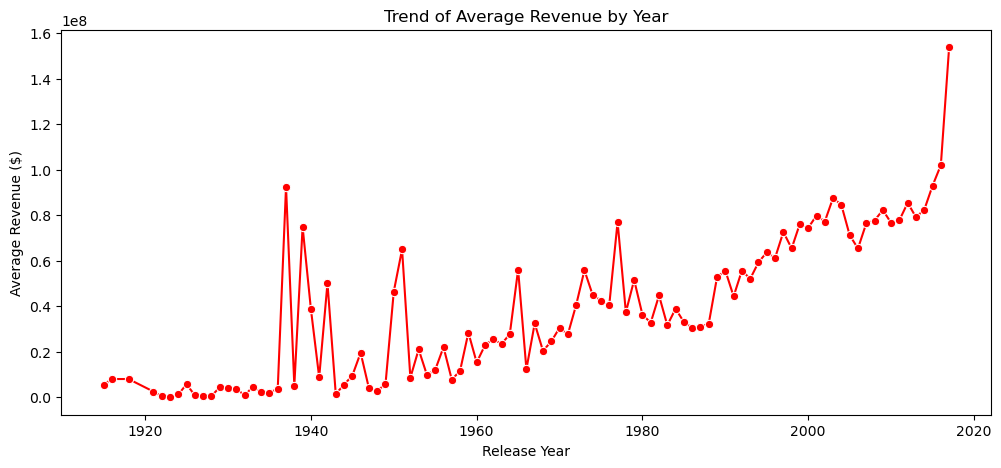

In [ ]:
monthly_revenue = df.groupby('release_month')['revenue'].mean().reset_index()

# คำนวณรายได้เฉลี่ยของแต่ละปี
yearly_revenue = df.groupby('release_year')['revenue'].mean().reset_index()

# ดูแนวโน้มรายได้เฉลี่ยต่อเดือน
plt.figure(figsize=(10, 5))
sns.barplot(x='release_month', y='revenue', data=monthly_revenue, palette='Blues_r')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Average Revenue by Release Month")
plt.xlabel("Release Month")
plt.ylabel("Average Revenue ($)")
plt.show()

# ดูแนวโน้มรายได้เฉลี่ยต่อปี
plt.figure(figsize=(12, 5))
sns.lineplot(x='release_year', y='revenue', data=yearly_revenue, marker="o", color='red')
plt.title("Trend of Average Revenue by Year")
plt.xlabel("Release Year")
plt.ylabel("Average Revenue ($)")
plt.show()

In [580]:
df.genres = df.genres.apply(eval).apply(lambda x: [genre['name'] for genre in x] if x else pd.NA)
df=df.dropna(subset=['genres'])
df.genres.info()

<class 'pandas.core.series.Series'>
Int64Index: 7384 entries, 0 to 45422
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
7384 non-null   object
dtypes: object(1)
memory usage: 115.4+ KB


In [581]:
df.genres

0             [Animation, Comedy, Family]
1            [Adventure, Fantasy, Family]
3                [Comedy, Drama, Romance]
4                                [Comedy]
5        [Action, Crime, Drama, Thriller]
                       ...               
45399                     [Crime, Comedy]
45401           [Drama, History, Mystery]
45409                     [Comedy, Drama]
45412                    [Romance, Drama]
45422    [Action, Comedy, Crime, Foreign]
Name: genres, Length: 7384, dtype: object

In [582]:
df['genres'] = df['genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
df['genres']

0            Animation Comedy Family
1           Adventure Fantasy Family
3               Comedy Drama Romance
4                             Comedy
5        Action Crime Drama Thriller
                    ...             
45399                   Crime Comedy
45401          Drama History Mystery
45409                   Comedy Drama
45412                  Romance Drama
45422    Action Comedy Crime Foreign
Name: genres, Length: 7384, dtype: object

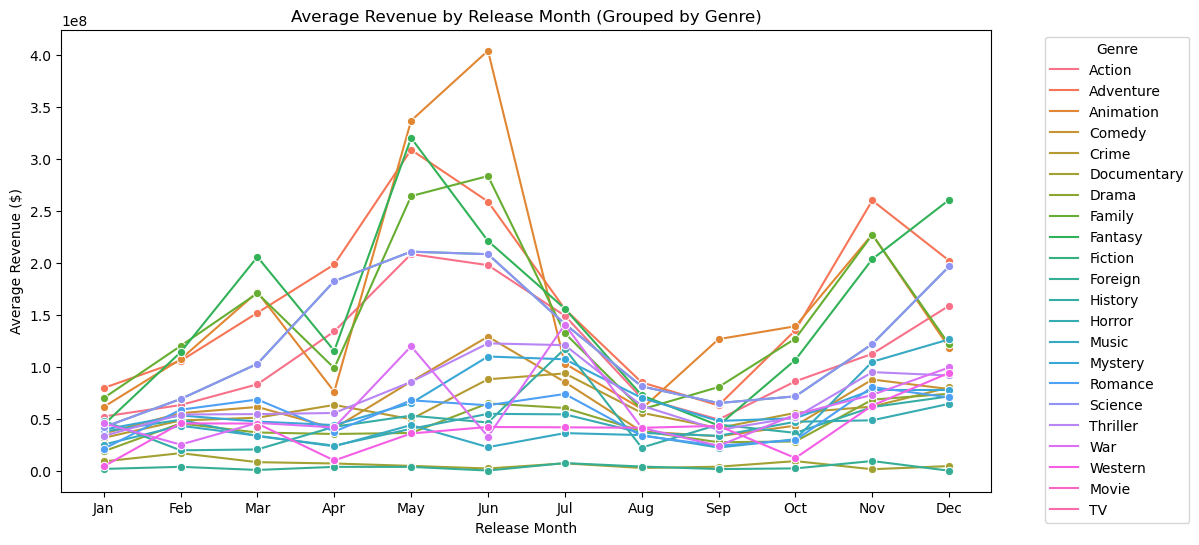

In [583]:
df['genres'] = df['genres'].str.strip('[]')
df['genres'] = df['genres'].str.split(' ')  # แยก genres ถ้ามีหลายแนว
df = df.explode('genres')  # ขยายข้อมูลให้ 1 แนวหนังต่อ 1 แถว

# 📌 คำนวณรายได้เฉลี่ยของแต่ละเดือน ตาม Genre
genre_monthly_revenue = df.groupby(['release_month', 'genres'])['revenue'].mean().reset_index()

# 📌 วาดกราฟ Line Plot ดูแนวโน้มของแต่ละแนวหนัง
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_monthly_revenue, x='release_month', y='revenue', hue='genres', marker="o")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Average Revenue by Release Month (Grouped by Genre)")
plt.xlabel("Release Month")
plt.ylabel("Average Revenue ($)")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Hypothesis testing
H0(Null Hypothesis): รายได้เฉลี่ยของหนังที่ฉายในไตรมาส 2 เท่ากับรายได้เฉลี่ยของหนังทั้งปี

H1(Alternative Hypothesis): รายได้เฉลี่ยของหนังที่ฉายในไตรมาส 2 สูงกว่า รายได้เฉลี่ยของหนังทั้งปี 30

In [584]:
mean_q2=df[(df['release_month']>4) & (df['release_month']<6)]['revenue'].mean()
mean_y=df['revenue'].mean()
expected_mean_q2 = 1.3 * mean_y
(mean_q2-mean_y)*100/mean_y

50.05261334205481

In [585]:
std_q2=df[(df['release_month']>4) & (df['release_month']<6)]['revenue'].std()
std_y=df['revenue'].std()


In [586]:
nq2=len(df[(df['release_month']>4) & (df['release_month']<6)]['revenue'])
ny=len(df['revenue'])
nq2,ny

(1474, 19242)

In [587]:
# สุ่มสร้างตัวอย่างข้อมูลจากการแจกแจงปกติ (ถ้าไม่มี raw data)
data_q2 = np.random.normal(mean_q2, std_q2, nq2)
data_year = np.random.normal(mean_y, std_y, ny)

# ทำ Two-Sample t-test แบบ one-tailed (แบบทางเดียว)
t_stat, p_value = stats.ttest_ind(data_q2, data_year, alternative='greater')

# แสดงผลลัพธ์
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# สรุปผล
alpha = 0.0001  # กำหนดระดับนัยสำคัญที่ 5%
if p_value < alpha:
    print("มีหลักฐานเพียงพอที่จะสรุปว่ารายได้เฉลี่ยของไตรมาส 2 สูงกว่าทั้งปี")
else:
    print("ไม่มีหลักฐานเพียงพอที่จะสรุปว่ารายได้เฉลี่ยของไตรมาส 2 สูงกว่าทั้งปี")

T-statistic: 9.0817
P-value: 0.0000
มีหลักฐานเพียงพอที่จะสรุปว่ารายได้เฉลี่ยของไตรมาส 2 สูงกว่าทั้งปี


In [588]:
# คำนวณค่า t-score
t_stat = (mean_q2 - expected_mean_q2) / (std_q2 / np.sqrt(nq2))

# คำนวณค่า p-value แบบ one-tailed test (ทางเดียว)
p_value = 1 - stats.t.cdf(t_stat, df=nq2 - 1)

# แสดงผลลัพธ์
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# ตัดสินผลลัพธ์
alpha = 0.05  # กำหนดระดับนัยสำคัญที่ 5%
if p_value < alpha:
    print("มีหลักฐานเพียงพอที่จะสรุปว่ารายได้เฉลี่ยของไตรมาส 2 มากกว่าทั้งปี 30%")
else:
    print("ไม่มีหลักฐานเพียงพอที่จะสรุปว่ารายได้เฉลี่ยของไตรมาส 2 มากกว่าทั้งปี 30%")

T-statistic: 2.9480
P-value: 0.0016
มีหลักฐานเพียงพอที่จะสรุปว่ารายได้เฉลี่ยของไตรมาส 2 มากกว่าทั้งปี 30%
